# EDA

Just opening and having a look at some data tables. The main features I'm interested in are the distribution of the magnetism number thing and the classes of interactions. I read in a kernel that the distribution was bimodal. If that's the case, then it might screw with bin predictions. Anyway.

In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib inline

In [10]:
import os, glob
import numpy as np
import pandas as pd
#import seaborn as sns
from collections import Counter
from tqdm import tqdm as tqdm
from scipy.stats import describe
from scipy.spatial.distance import pdist, squareform
#from biopandas.mol2 import PandasMol2
#from matplotlib import pyplot as plt

RuntimeError: module compiled against API version 0xa but this version of numpy is 0x9

In [11]:
import openbabel as ob

In [12]:
#first set our data paths
data_path = './data/'
xyz_path = data_path + 'xyz/'

In [13]:
#scc = pd.read_csv(data_path + 'scalar_coupling_contributions.csv')

In [14]:
#scc.head()

In [15]:
mol2_path = data_path + 'mol2/'

In [16]:
#mol_fs = glob.glob(mol2_path + '*.mol2')
fnames = glob.glob(xyz_path + '*.xyz')
#mols = mc.read_from_mol2(mol_fs[0], hydrogens=False)[0]
#graph = mols.NX_graph()

In [9]:
#mol.NumAtoms()

In [10]:
#for a in ob.OBMolAngleIter(mol):
#    l = [mol.GetAtomById(g) for g in a]
#    print(a, mol.GetAngle(*l))

In [11]:
"""
obConversion = ob.OBConversion()
obConversion.SetInAndOutFormats("xyz", "mol2")
pad_size = 4

for f in tqdm(fnames):
    mname = f.split('/')[-1].split('.')[0]
    mol = ob.OBMol()
    obConversion.ReadFile(mol, f)
    
    torsion_indices = np.array([[b.GetBeginAtomIdx(), b.GetEndAtomIdx()] for b in ob.OBMolBondIter(mol)])
    torsion_indices -= 1
    
    n_atoms = mol.NumAtoms()
    
    #we'll put regular angles on first layer
    #and torsions on the second layer
    #angle_matrix = np.zeros((2, n_atoms, n_atoms))
    #for angle_set in ob.OBMolAngleIter(mol):
    #    ix1 = angle_set[0]
    #    ix2 = angle_set[-1]
    #     print(angle_set)
    #    atoms = [mol.GetAtomById(a) for a in angle_set]
    #    angle = mol.GetAngle(*atoms)
    #    if angle_matrix[0, ix1, ix2] != 0:
    #        angle = (angle_matrix[0, ix1, ix2] + angle) / 2
    #    angle_matrix[0, ix1, ix2] = angle
    #    angle_matrix[0, ix2, ix1] = angle
    
    #angle_indices = np.array([angle_set for angle_set in ob.OBMolAngleIter(mol)])
    rev_ti = torsion_indices[:, ::-1]
    torsion_indices = np.concatenate([torsion_indices, rev_ti], axis=0)
    sort_idx = np.argsort(torsion_indices[:, 0])
    torsion_indices = torsion_indices[sort_idx]
    
    #torsion_indices = np.array([angle_set for angle_set in ob.OBMolAngleIter(mol)])
    #torsion_indices = np.array([torsion_set for torsion_set in ob.OBMolTorsionIter(mol)])
    if len(torsion_indices) == 0:
        pad = pad_size
        padding = np.repeat([[-1, -1]], pad * n_atoms, axis=0)
        np.save(data_path + 'groups1/' + mname + '.npy', padding)
        continue
        
    #rev_ti = torsion_indices[:, ::-1]
    #torsion_indices = np.concatenate([torsion_indices, rev_ti], axis=0)
    #sort_idx = np.argsort(torsion_indices[:, 0])
    #torsion_indices = torsion_indices[sort_idx]
    
    for pos, n in enumerate(range(n_atoms)):
        k = np.where(torsion_indices[:, 0] == n)[0]
        if len(k) == 0:
            count = 0
            insert_point = pos * pad_size
        else:
            count = max(k) - min(k) + 1
            insert_point = max(k) + 1
    
        pad = pad_size - count
        padding = np.repeat([[-1, -1]], pad, axis=0)
        torsion_indices = np.insert(torsion_indices, insert_point, padding, axis=0)

    assert(torsion_indices.shape[0] == n_atoms * pad_size), "Bad size"
    np.save(data_path + 'groups1/' + mname + '.npy', torsion_indices)
"""

'\nobConversion = ob.OBConversion()\nobConversion.SetInAndOutFormats("xyz", "mol2")\npad_size = 4\n\nfor f in tqdm(fnames):\n    mname = f.split(\'/\')[-1].split(\'.\')[0]\n    mol = ob.OBMol()\n    obConversion.ReadFile(mol, f)\n    \n    torsion_indices = np.array([[b.GetBeginAtomIdx(), b.GetEndAtomIdx()] for b in ob.OBMolBondIter(mol)])\n    torsion_indices -= 1\n    \n    n_atoms = mol.NumAtoms()\n    \n    #we\'ll put regular angles on first layer\n    #and torsions on the second layer\n    #angle_matrix = np.zeros((2, n_atoms, n_atoms))\n    #for angle_set in ob.OBMolAngleIter(mol):\n    #    ix1 = angle_set[0]\n    #    ix2 = angle_set[-1]\n    #     print(angle_set)\n    #    atoms = [mol.GetAtomById(a) for a in angle_set]\n    #    angle = mol.GetAngle(*atoms)\n    #    if angle_matrix[0, ix1, ix2] != 0:\n    #        angle = (angle_matrix[0, ix1, ix2] + angle) / 2\n    #    angle_matrix[0, ix1, ix2] = angle\n    #    angle_matrix[0, ix2, ix1] = angle\n    \n    #angle_indices

In [12]:
obConversion = ob.OBConversion()
obConversion.SetInAndOutFormats("xyz", "mol2")

all_angles = []
all_torsions = []
for f in tqdm(fnames):
    mname = f.split('/')[-1].split('.')[0]
    mol = ob.OBMol()
    obConversion.ReadFile(mol, f)
    
    n_atoms = mol.NumAtoms()
    
    #placeholder1 = -np.ones((n_atoms, n_atoms, 2))
    #bond_indices = np.array([[b.GetBeginAtomIdx(), b.GetEndAtomIdx()] for b in ob.OBMolBondIter(mol)])
    #bond_indices -= 1
    
    #if len(bond_indices) == 0:
    #    np.save(data_path + 'set1/' + mname + '.npy', placeholder1)
    #    continue
        
    #rev_bi = bond_indices[:, ::-1]
    #bond_indices = np.concatenate([bond_indices, rev_bi], axis=0)
    #for bi in bond_indices:
    #    ix1, ix2 = bi[0], bi[-1]
    #    placeholder1[ix1, ix2] = bi
        
    #np.save(data_path + 'set1/' + mname + '.npy', placeholder1)
    
    #placeholder2 = -np.ones((n_atoms, n_atoms, 3))
    angle_indices = np.array([angle_set for angle_set in ob.OBMolAngleIter(mol)])
    #angle_indices[:, [0, 1]] = angle_indices[:, [1, 0]]

    #if len(angle_indices) == 0:
    #    np.save(data_path + 'set2/' + mname + '.npy', placeholder2)
    #    continue
        
    #rev_ai = angle_indices[:, ::-1]
    #angle_indices = np.concatenate([angle_indices, rev_ai], axis=0)
    angles = np.zeros((2, n_atoms, n_atoms))
    for ai in angle_indices:
        #ix1, ix2 = ai[1], ai[-1]
        atoms = [mol.GetAtomById(idx) for idx in ai]
        a = mol.GetAngle(*atoms)
        #angles[0, ix1, ix2] = a
        #angles[0, ix2, ix1] = a
        all_angles.append(a)
    
    #np.save(data_path + 'set2/' + mname + '.npy', placeholder2)
    torsion_indices = np.array([torsion_set for torsion_set in ob.OBMolTorsionIter(mol)])
    for ti in torsion_indices:
        #ix1, ix2 = ti[0], ti[-1]
        atoms = [mol.GetAtomById(idx) for idx in ti]
        a = mol.GetTorsion(*atoms)
        #angles[1, ix1, ix2] = a
        #angles[1, ix2, ix1] = a
        all_torsions.append(a)
    
    
    #np.save(data_path + 'angles/' + mname + '.npy', angles)

    #placeholder3 = -np.ones((n_atoms, n_atoms, 4))
    #torsion_indices = np.array([torsion_set for torsion_set in ob.OBMolTorsionIter(mol)])
    
    #torsion_angles = np.zeros((n_atoms, n_atoms))
    #for ti in torsion_indices:
    #    ix1, ix2 = ti[0], ti[-1]
    #    atoms = [mol.GetAtomById(idx) for idx in ti]
    #    t = mol.GetTorsion(*atoms)
    #    torsion_angles[ix1, ix2] = t
    #    torsion_angles[ix2, ix1] = t
        
    #print(mol.GetTorsion(*ti))
    
    #if len(torsion_indices) == 0:
    #    np.save(data_path + 'set3/' + mname + '.npy', placeholder3)
    #    continue
        
    #rev_ti = torsion_indices[:, ::-1]
    #torsion_indices = np.concatenate([torsion_indices, rev_ti], axis=0)
    #for ti in torsion_indices:
    #    ix1, ix2 = ti[0], ti[-1]
    #    placeholder3[ix1, ix2] = ti
        
    #np.save(data_path + 'set3/' + mname + '.npy', placeholder3)
    #np.save(data_path + 'torsions/' + mname + '.npy', torsion_angles)

100%|██████████| 130775/130775 [02:42<00:00, 805.30it/s]


In [13]:
all_angles = np.array(all_angles)
print(all_angles.mean(), all_angles.std())

(31.840896131856056, 8.8498097003957383)


In [14]:
all_torsions = np.array(all_torsions)
print(all_torsions.mean(), all_torsions.std())

(0.18191652573296643, 108.19120668484263)


In [53]:
obConversion = ob.OBConversion()
obConversion.SetInAndOutFormats("xyz", "mol2")
for f in tqdm(fnames):
    mname = f.split('/')[-1].split('.')[0]
    mol = ob.OBMol()
    obConversion.ReadFile(mol, f)
    
    n_atoms = mol.NumAtoms()
    #we'll put regular angles on first layer
    #and torsions on the second layer
    #at most there are only 2 possible paths through which
    #a 2J coupling could occur (1 inbetween atom for each)
    paths2 = -np.ones((2, n_atoms, n_atoms))
    for angle_set in ob.OBMolAngleIter(mol):
        ix1 = angle_set[0]
        ix2 = angle_set[-1]
        middle_ix = angle_set[1]
        
        if paths2[0, ix1, ix2] != -1:
            paths2[1, ix1, ix2] = middle_ix
            paths2[1, ix2, ix1] = middle_ix
        else:
            paths2[0, ix1, ix2] = middle_ix
            paths2[0, ix2, ix1] = middle_ix
    
    paths3 = -np.ones((4, n_atoms, n_atoms))
    for torsion_set in ob.OBMolTorsionIter(mol):
        ix1 = torsion_set[0]
        ix2 = torsion_set[-1]
        middle_ix1 = torsion_set[1]
        middle_ix2 = torsion_set[2]
        
        if paths3[0, ix1, ix2] != -1:
            paths3[2, ix1, ix2] = middle_ix1
            paths3[2, ix2, ix1] = middle_ix1
            paths3[3, ix1, ix2] = middle_ix2
            paths3[3, ix2, ix1] = middle_ix2
        else:
            paths3[0, ix1, ix2] = middle_ix1
            paths3[0, ix2, ix1] = middle_ix1
            paths3[1, ix1, ix2] = middle_ix2
            paths3[1, ix2, ix1] = middle_ix2
        
    np.save(data_path + 'paths2/' + mname + '.npy', paths2)
    np.save(data_path + 'paths3/' + mname + '.npy', paths3)

  0%|          | 31/130775 [00:02<2:13:49, 16.28it/s]


KeyboardInterrupt: 

In [9]:
ix = 1
lookup = {}
all_charges = []
for f in tqdm(mol_fs):
    mname = f.split('/')[-1].split('.')[0]
    pmol = PandasMol2().read_mol2(f)
    charges = pmol.df.charge.values
    atoms = pmol.df.atom_type.values
    
    encoded = []
    for a in atoms:
        if a not in lookup:
            lookup[a] = ix
            ix += 1
        
        encoded.append(lookup[a])
    
    all_charges.extend(charges)
    np.save(data_path + 'atoms/' + mname + '.npy', np.array(encoded))
    np.save(data_path + 'charges/' + mname + '.npy', charges)

100%|██████████| 130775/130775 [49:58<00:00, 43.61it/s] 


17 types of atoms  
charge mean: 0.0014077977001312417  
charge std: 0.14296595773192838  

In [5]:
#get a list of all the files that we have to work with (aside from the coordinate files)
files = glob.glob(data_path + '*.csv')
files

['./data/mulliken_charges.csv',
 './data/potential_energy.csv',
 './data/magnetic_shielding_tensors.csv',
 './data/sample_submission.csv',
 './data/test.csv',
 './data/dipole_moments.csv',
 './data/scalar_coupling_contributions.csv',
 './data/train.csv',
 './data/structures.csv']

All the additional data files (meaning everything other than train, test and structures), contains data for the training set only. Therefore, that data cannot be used in any training procedures. It could however be used as for making auxiliary predictions. In principle, such auxiliary targets should alleviate overfitting.

In [5]:
#let's open each file and see what's inside
structures = pd.read_csv(data_path + 'structures.csv')
structures.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [6]:
structures[structures.molecule_name == 'dsgdb9nsd_000003']

,molecule_name,atom_index,atom,x,y,z
9,dsgdb9nsd_000003,0,O,-0.034360,0.977540,0.007602
10,dsgdb9nsd_000003,1,H,0.064766,0.020572,0.001535
11,dsgdb9nsd_000003,2,H,0.871790,1.300792,0.000693


In [17]:
test = pd.read_csv(data_path + 'train.csv')

In [19]:
test[test.molecule_name == 'dsgdb9nsd_047557']

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
1465826,1465826,dsgdb9nsd_047557,9,1,2JHC,-5.658100
1465827,1465827,dsgdb9nsd_047557,9,2,1JHC,86.705900
1465828,1465828,dsgdb9nsd_047557,9,3,2JHC,-1.815190
1465829,1465829,dsgdb9nsd_047557,9,4,3JHC,8.693370
1465830,1465830,dsgdb9nsd_047557,9,8,3JHC,3.671710
1465831,1465831,dsgdb9nsd_047557,9,10,2JHH,-10.416700
1465832,1465832,dsgdb9nsd_047557,9,11,3JHH,3.236080
1465833,1465833,dsgdb9nsd_047557,9,12,3JHH,3.397060
1465834,1465834,dsgdb9nsd_047557,10,1,2JHC,-2.068730
1465835,1465835,dsgdb9nsd_047557,10,2,1JHC,81.449800


In [8]:
test_group = scc.groupby(by='molecule_name')

In [9]:
scc.head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


In [10]:
atom_0s = scc['atom_index_0'].values
atom_1s = scc['atom_index_1'].values
fc = scc['fc'].values
sd = scc['sd'].values
pso = scc['pso'].values
dso = scc['dso'].values

In [35]:
#atoms = structures['atom'].values
#lookup = {'C': 1, 'F': 2, 'H': 3, 'N': 4, 'O': 5}
for i, (fname, idx) in tqdm(enumerate(test_group.groups.items())):
    n_atoms = np.load('./data/atoms/{}.npy'.format(fname)).shape[0]
    contribs = np.zeros((4, n_atoms, n_atoms))
    
    ix0 = atom_0s[idx.values]
    ix1 = atom_1s[idx.values]
    fc0 = fc[idx.values]
    sd0 = sd[idx.values]
    pso0 = pso[idx.values]
    dso0 = dso[idx.values]
    
    contribs[0][(ix0, ix1)] = fc0
    contribs[1][(ix0, ix1)] = sd0
    contribs[2][(ix0, ix1)] = pso0
    contribs[3][(ix0, ix1)] = dso0
    
    contribs[0][(ix1, ix0)] = fc0
    contribs[1][(ix1, ix0)] = sd0
    contribs[2][(ix1, ix0)] = pso0
    contribs[3][(ix1, ix0)] = dso0

    np.save('./data/contribs/{}.npy'.format(fname), contribs)

85003it [26:03, 54.36it/s] 


In [26]:
np.array(list(test_group.groups.values()))[:5]

array([Int64Index([0, 1, 2, 3, 4], dtype='int64'),
       Int64Index([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], dtype='int64'),
       Int64Index([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
            40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55],
           dtype='int64'),
       Int64Index([56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69], dtype='int64'),
       Int64Index([ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
             83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
             96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106],
           dtype='int64')], dtype=object)

In [24]:
test_group.mean()

,id,atom_index_0,atom_index_1
molecule_name,,,
dsgdb9nsd_000004,4658149.0,2.400000,1.000000
dsgdb9nsd_000015,4658160.5,5.277778,2.722222
dsgdb9nsd_000016,4658186.0,4.969697,3.575758
dsgdb9nsd_000020,4658209.5,5.428571,1.714286
dsgdb9nsd_000022,4658235.0,7.054054,3.486486
dsgdb9nsd_000024,4658255.0,3.000000,1.000000
dsgdb9nsd_000035,4658271.5,6.066667,3.533333
dsgdb9nsd_000036,4658297.5,5.681818,2.772727
dsgdb9nsd_000041,4658324.0,6.870968,4.032258


In [19]:
#group = structures.groupby(by='molecule_name')
#df2 = group.apply(lambda x: np.save('./data/maps/nodes/{}.npy'.format(x['molecule_name']), x['atom'].values))

In [10]:
#let's count the number of atoms per molecule
#a mix of small and large molecules could require additional padding/cropping
atom_count = Counter(structures['molecule_name'].values).values()

(array([  7.00000000e+00,   7.70000000e+01,   6.36000000e+02,
          7.26900000e+03,   1.69680000e+04,   4.82300000e+04,
          4.37140000e+04,   1.07890000e+04,   2.69400000e+03,
          3.91000000e+02]),
 array([  3. ,   5.6,   8.2,  10.8,  13.4,  16. ,  18.6,  21.2,  23.8,
         26.4,  29. ]),
 <a list of 10 Patch objects>)

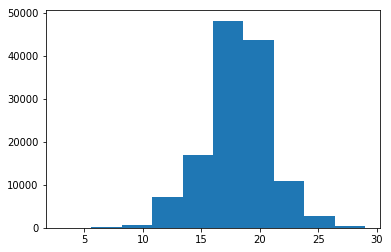

In [11]:
plt.hist(atom_count)

Good, we only have to dealing with molecules that have 6-29 atoms. Computationally, it's easiest to use the largest size we'll encounter since it won't require any stitching to get a final prediction (of course convolutional network might be able to handle variable size input).

<BarContainer object of 5 artists>

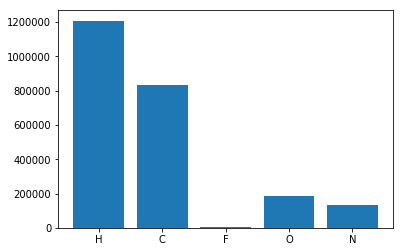

In [12]:
atom_counter = Counter(structures['atom'].values)
atoms = atom_counter.keys()
atom_counts = atom_counter.values()

plt.bar(atoms, atom_counts)

In [13]:
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')

In [14]:
train_type_counter = Counter(train['type'].values)
train_types = train_type_counter.keys()
train_type_counts = train_type_counter.values()

test_type_counter = Counter(test['type'].values)
test_types = test_type_counter.keys()
test_type_counts = test_type_counter.values()

<BarContainer object of 8 artists>

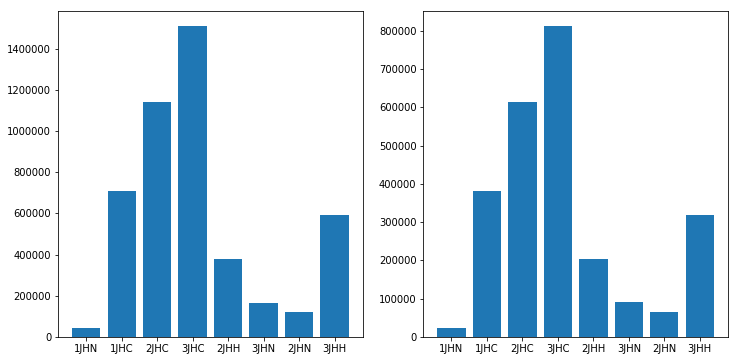

In [15]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(train_types, train_type_counts)
ax[1].bar(test_types, test_type_counts)

Clearly there is some class imbalance that probably will need to be handled. Fortunately, the class distributions are the same between train and test.

DescribeResult(nobs=4658147, minmax=(-36.218600000000002, 204.88), mean=15.921649918259099, variance=1220.9417857191677, skewness=2.0242516345716504, kurtosis=3.028373848038406)


(array([  8.90570000e+04,   3.74351600e+06,   8.23670000e+04,
          2.85500000e+04,   1.97911000e+05,   3.89695000e+05,
          1.04073000e+05,   1.36880000e+04,   3.00000000e+01,
          9.26000000e+03]),
 array([ -36.2186 ,  -12.10874,   12.00112,   36.11098,   60.22084,
          84.3307 ,  108.44056,  132.55042,  156.66028,  180.77014,  204.88   ]),
 <a list of 10 Patch objects>)

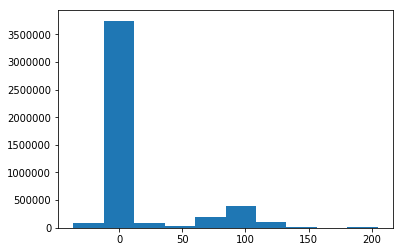

In [16]:
print(describe(train.scalar_coupling_constant))
plt.hist(train.scalar_coupling_constant)

Values are indeed bimodal, the total range of values that we're considering is somewhat large (240) relative to the precision of the measurements. I'll be curious to test should fine grained predictions need to be to get a good score (e.g. can predicting a rounded number still give good results).

Average value is 15, but you can clearly see that almost all of the values fall between -12 and +12.

In [17]:
train.columns

Index([u'id', u'molecule_name', u'atom_index_0', u'atom_index_1', u'type',
       u'scalar_coupling_constant'],
      dtype='object')

Simplest idea I have is to use the xyz coordinates and construct a distance matrix (map) that is 29x29. We have 8 types of coupling, we can either use 8 one hot encoded input layers or a few embedding layers. We have 5 types of atoms (I believe I read that all flourines are ignored during calculation so it might be 4 that we really care about), this implies that we have 15 types of bonds; again, we can either one hot encode or create embeddings for this data.

Our output is a prediction map of pair-wise scalar coupling constants with the same size as our input features (but only 1 channel). We can also try to predict auxiliary features using the additional data that we were given.

Since we have identical data distributions between test and training sets, I think that we can get away with just use cross validation (although holdout validation is much easier for a lazy person like me!).

In [18]:
def make_distance_matrix(structures_df, molecule_name):
    mask = structures_df['molecule_name'] == molecule_name
    molecule_structure = structures_df[mask]
    
    #get x,y,z coordinates and stack them
    x_coords = molecule_structure.x.values
    y_coords = molecule_structure.y.values
    z_coords = molecule_structure.z.values
    coords = np.stack([x_coords, y_coords, z_coords], axis=1)
    dist_mat = squareform(pdist(coords))
    
    #now we also want to get a matrix with the type of bonds associated with a distance
    pairs = {'CC': 1, 'CF': 2, 'CH': 3, 'CN': 4, 'CO': 5, 'FF': 6, 'FH': 7, 'FN': 8, 
             'FO': 9, 'HH': 10, 'HN': 11, 'HO': 12, 'NN': 13, 'NO': 14, 'OO': 15}
    
    #get atom types for all atoms
    atoms = molecule_structure.atom.values
    
    #create an array of zeros for hold values
    atom_mat = np.zeros_like(dist_mat, dtype=np.uint8)
    for i, a1 in enumerate(atoms):
        for j, a2 in enumerate(atoms):
            pair = ''.join(sorted(a1 + a2))
            value = pairs[pair]
            atom_mat[i][j] = value

    #now compute the distance matrix and convert it to squareform
    return dist_mat, atom_mat

In [19]:
def make_constant_matrix(structures_df, train_df, molecule_name):
    mask = structures_df['molecule_name'] == molecule_name
    n_atoms = len(structures_df[mask])
    
    #now constuct a square zeros matrix with size n_atoms x n_atoms
    constant_mat = np.zeros((n_atoms, n_atoms),dtype=np.float32)
    
    #now get the atom_index_1, atom_index_2, and scalar_coupling_constants
    mask = train_df['molecule_name'] == molecule_name
    molecule_df = train_df[mask]
    index1 = molecule_df.atom_index_0
    index2 = molecule_df.atom_index_1
    coupling_constant = molecule_df.scalar_coupling_constant
    indices = np.stack([index1, index2], axis=1)
    
    for i1, i2, const in zip(index1, index2, coupling_constant):
        constant_mat[i1][i2] = const
        constant_mat[i2][i1] = const
        
    #now also get the types of coupling and store it as a matrix
    type_dict = {'1JHC': 2, '1JHN': 1, '2JHC': 3, '2JHH': 5, '2JHN': 7, '3JHC': 4,'3JHH': 8, '3JHN': 6}
    type_mat = np.zeros_like(constant_mat, dtype=np.uint8)
    types = molecule_df.type.values
    
    for i1, i2, t in zip(index1, index2, types):
        type_mat[i1][i2] = type_dict[t]
        type_mat[i2][i1] = type_dict[t]
        
    return constant_mat, type_mat

In [20]:
type_dict = {t: ix + 1 for ix, t in enumerate(train_types)}

In [21]:
type_dict

{'1JHC': 2,
 '1JHN': 1,
 '2JHC': 3,
 '2JHH': 5,
 '2JHN': 7,
 '3JHC': 4,
 '3JHH': 8,
 '3JHN': 6}

In [25]:
#lets generate our distance maps and save them as numpy arrays.
#NOTE: this will take 5 hours to complete!
save_path = data_path + 'maps/train/dist/'
molecule_names = np.unique(train.molecule_name)

dmat, atom_mat = make_distance_matrix(structures, molecule_names[0])
constant_mat, type_mat = make_constant_matrix(structures, train, molecule_names[0])
np.save(save_path + molecule_names[0] + '.npy', np.stack([dmat, atom_mat, type_mat], axis=0))

#for molecule_name in tqdm(molecule_names):
#    dist = make_distance_matrix(structures, molecule_name)
#    np.save(save_path + molecule_name + '.npy', dist)

In [33]:
np.load('./data/maps/train/target/' + molecule_names[0] + '.npy')

array([[  0.        ,  84.80760193,  84.80740356,  84.80930328,
         84.80950165],
       [ 84.80760193,   0.        , -11.25699997, -11.25479984,
        -11.25430012],
       [ 84.80740356, -11.25699997,   0.        , -11.25409985,
        -11.25479984],
       [ 84.80930328, -11.25479984, -11.25409985,   0.        ,
        -11.25430012],
       [ 84.80950165, -11.25430012, -11.25479984, -11.25430012,   0.        ]], dtype=float32)